In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/short-dark-triad/SD3/codebook.txt
/kaggle/input/short-dark-triad/SD3/data.csv


In [12]:
!pip install pygad scikit-fuzzy torchviz ga --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 31.1 MB/s eta 0:00:00


In [45]:
data=pd.read_csv("/kaggle/input/short-dark-triad/SD3/data.csv",sep='\t')
data.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,...,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,...,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,...,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,...,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,...,5,3,1,4,3,5,4,1,GB,3


In [46]:
question_cols = data.columns[:-2]
tech_cols = ['source', 'country']  # technical information
data[question_cols] = data[question_cols].apply(pd.to_numeric, errors='coerce')
X = data[question_cols].values

In [11]:
question_cols

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9'],
      dtype='object')

In [12]:
X

array([[4, 4, 4, ..., 4, 4, 4],
       [2, 1, 5, ..., 5, 3, 2],
       [3, 3, 3, ..., 2, 3, 1],
       ...,
       [4, 3, 3, ..., 2, 4, 1],
       [5, 4, 3, ..., 4, 1, 3],
       [4, 4, 4, ..., 3, 4, 4]])

In [46]:
# Visualize the model architecture using torchviz
import torch
from torchviz import make_dot

# Create a dummy input tensor with the same number of features as the PCA-reduced data.
dummy_input = torch.randn(1, X_reduced.shape[1])  # shape: (1, input_dim)
model_output = model(dummy_input)

# Generate a graph of the model.
dot = make_dot(model_output, params=dict(list(model.named_parameters())))
dot.render("ANFIS_model_architecture", format="png")  # This will save 'ANFIS_model_architecture.png'


'ANFIS_model_architecture.png'

Normalized data shape: (18192, 27)
Reduced data shape: (18192, 9)
Pseudo-label distribution: [4936 7618 5638]
ANFIS(
  (fuzzy): FuzzyLayer()
  (rule): RuleLayer()
  (consequent): ConsequentLayer()
)
Epoch 1/20 - Train Loss: 0.5040 - Val Loss: 0.1621
Epoch 2/20 - Train Loss: 0.1163 - Val Loss: 0.1037
Epoch 3/20 - Train Loss: 0.1003 - Val Loss: 0.0948
Epoch 4/20 - Train Loss: 0.0917 - Val Loss: 0.0962
Epoch 5/20 - Train Loss: 0.0889 - Val Loss: 0.0898
Epoch 6/20 - Train Loss: 0.0859 - Val Loss: 0.0914
Epoch 7/20 - Train Loss: 0.0836 - Val Loss: 0.0844
Epoch 8/20 - Train Loss: 0.0808 - Val Loss: 0.0824
Epoch 9/20 - Train Loss: 0.0793 - Val Loss: 0.0820
Epoch 10/20 - Train Loss: 0.0766 - Val Loss: 0.0775
Epoch 11/20 - Train Loss: 0.0744 - Val Loss: 0.0751
Epoch 12/20 - Train Loss: 0.0737 - Val Loss: 0.0749
Epoch 13/20 - Train Loss: 0.0717 - Val Loss: 0.0746
Epoch 14/20 - Train Loss: 0.0715 - Val Loss: 0.0728
Epoch 15/20 - Train Loss: 0.0702 - Val Loss: 0.0722
Epoch 16/20 - Train Loss: 0.06

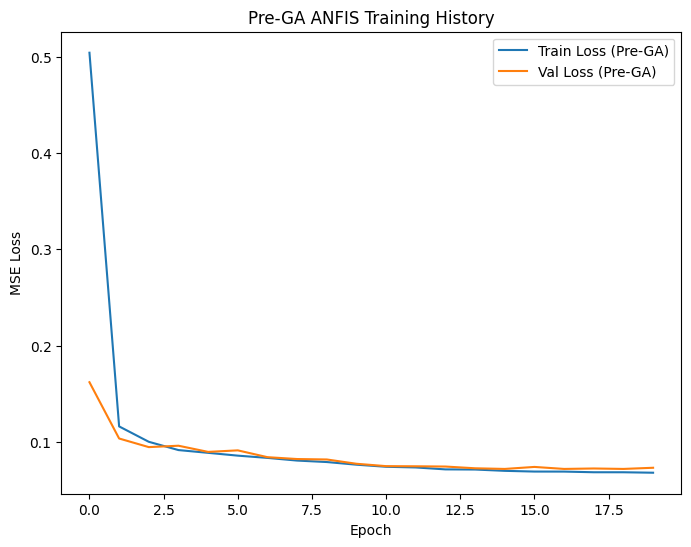

In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# =============================================================================
# Data Loading & Preprocessing
# =============================================================================
data = pd.read_csv('/kaggle/input/short-dark-triad/SD3/data.csv', sep='\t')
question_cols = [f"M{i}" for i in range(1, 10)] + [f"N{i}" for i in range(1, 10)] + [f"P{i}" for i in range(1, 10)]
data[question_cols] = data[question_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=question_cols)
X = data[question_cols].values
X_norm = (X - 1) / 4.0
print("Normalized data shape:", X_norm.shape)

# =============================================================================
# Dimensionality Reduction & Pseudo-labeling
# =============================================================================
pca = PCA(n_components=9)  # you can adjust n_components
X_reduced = pca.fit_transform(X_norm)
print("Reduced data shape:", X_reduced.shape)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pseudo_labels = kmeans.fit_predict(X_reduced)
y = pseudo_labels.astype(float).reshape(-1, 1)
print("Pseudo-label distribution:", np.bincount(pseudo_labels))

# Convert to PyTorch tensors
X_reduced_tensor = torch.tensor(X_reduced, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# =============================================================================
# Define Custom ANFIS Modules in PyTorch
# =============================================================================

class FuzzyLayer(nn.Module):
    def __init__(self, input_dim, num_mfs=2):
        super(FuzzyLayer, self).__init__()
        self.input_dim = input_dim
        self.num_mfs = num_mfs
        # Trainable parameters for each input: centers and sigmas.
        self.centers = nn.Parameter(torch.rand(input_dim, num_mfs))
        self.sigmas = nn.Parameter(torch.rand(input_dim, num_mfs))
    
    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x_expanded = x.unsqueeze(2)  # shape: (batch, input_dim, 1)
        membership = torch.exp(- (x_expanded - self.centers)**2 / (2 * self.sigmas**2 + 1e-6))
        return membership  # shape: (batch, input_dim, num_mfs)

class RuleLayer(nn.Module):
    def __init__(self):
        super(RuleLayer, self).__init__()
    
    def forward(self, x):
        # Flatten all but the batch dimension.
        batch_size = x.shape[0]
        flat = x.view(batch_size, -1)
        return flat

class ConsequentLayer(nn.Module):
    def __init__(self, num_rules, output_dim=1):
        super(ConsequentLayer, self).__init__()
        self.num_rules = num_rules
        self.output_dim = output_dim
        # Consequent parameters (one weight per rule, per output)
        self.consequents = nn.Parameter(torch.rand(num_rules, output_dim))
    
    def forward(self, x):
        # x shape: (batch_size, num_rules)
        norm_firing = x / (torch.sum(x, dim=1, keepdim=True) + 1e-6)
        output = torch.matmul(norm_firing, self.consequents)
        return output

class ANFIS(nn.Module):
    def __init__(self, input_dim, num_mfs=2, output_dim=1):
        super(ANFIS, self).__init__()
        self.fuzzy = FuzzyLayer(input_dim, num_mfs)
        self.rule = RuleLayer()
        # Total number of rules = input_dim * num_mfs (simplified approach)
        self.num_rules = input_dim * num_mfs
        self.consequent = ConsequentLayer(self.num_rules, output_dim)
    
    def forward(self, x):
        fuzzy_out = self.fuzzy(x)       # (batch, input_dim, num_mfs)
        rule_out = self.rule(fuzzy_out)   # (batch, input_dim * num_mfs)
        output = self.consequent(rule_out) # (batch, output_dim)
        return output

# =============================================================================
# Helper functions to flatten and set model parameters
# =============================================================================
def get_flat_params(model):
    """Flatten model parameters into a 1D numpy array."""
    return np.concatenate([p.detach().cpu().numpy().flatten() for p in model.parameters()])

def set_flat_params(model, flat_params):
    """Set model parameters from a flat numpy array."""
    pointer = 0
    for p in model.parameters():
        numel = p.numel()
        new_val = flat_params[pointer:pointer+numel].reshape(p.shape)
        p.data = torch.tensor(new_val, dtype=p.data.dtype, device=p.data.device)
        pointer += numel

# =============================================================================
# Build and Train the ANFIS Model using Gradient Descent
# =============================================================================
input_dim = X_reduced.shape[1]
num_mfs = 2
output_dim = 1
model = ANFIS(input_dim=input_dim, num_mfs=num_mfs, output_dim=output_dim)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
batch_size = 16
dataset_size = X_reduced_tensor.shape[0]

# Create training and validation splits (80/20)
indices = np.arange(dataset_size)
np.random.shuffle(indices)
split = int(0.8 * dataset_size)
train_idx, val_idx = indices[:split], indices[split:]
X_train = X_reduced_tensor[train_idx]
y_train = y_tensor[train_idx]
X_val = X_reduced_tensor[val_idx]
y_val = y_tensor[val_idx]

loss_history = []
val_loss_history = []
for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size()[0])
    epoch_loss = 0.0
    for i in range(0, X_train.size()[0], batch_size):
        optimizer.zero_grad()
        indices_batch = permutation[i:i+batch_size]
        batch_x = X_train[indices_batch]
        batch_y = y_train[indices_batch]
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)
    epoch_loss /= X_train.size()[0]
    loss_history.append(epoch_loss)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val).item()
        val_loss_history.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f} - Val Loss: {val_loss:.4f}")

# =============================================================================
# GA Optimization to Refine ANFIS Parameters
# =============================================================================

# GA hyperparameters
population_size = 100
num_generations = 40
mutation_rate = 0.2
crossover_rate = 0.7

# Flatten initial model parameters as starting point
base_params = get_flat_params(model)
param_size = base_params.shape[0]

# Initialize a population around the current model parameters
population = np.array([base_params + np.random.randn(param_size) * 0.05 for _ in range(population_size)])

def fitness_function(candidate):
    """Fitness is the inverse of the validation MSE (plus a small epsilon)."""
    set_flat_params(model, candidate)
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        mse = mean_squared_error(y_val.cpu().numpy(), val_pred.cpu().numpy())
    return 1.0 / (mse + 1e-6)

def tournament_selection(pop, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(pop)):
        participants = np.random.choice(len(pop), tournament_size, replace=False)
        best = participants[np.argmax([fitnesses[i] for i in participants])]
        selected.append(pop[best])
    return np.array(selected)

def crossover(parent1, parent2):
    # One-point crossover
    point = np.random.randint(1, param_size)
    child = np.concatenate((parent1[:point], parent2[point:]))
    return child

def mutate(candidate, mutation_rate):
    for i in range(param_size):
        if np.random.rand() < mutation_rate:
            candidate[i] += np.random.randn() * 0.01
    return candidate

best_candidate = None
best_fitness = -np.inf

for gen in range(num_generations):
    fitnesses = np.array([fitness_function(candidate) for candidate in population])
    gen_best_idx = np.argmax(fitnesses)
    if fitnesses[gen_best_idx] > best_fitness:
        best_fitness = fitnesses[gen_best_idx]
        best_candidate = population[gen_best_idx].copy()
    print(f"Generation {gen+1}/{num_generations} - Best Fitness: {fitnesses[gen_best_idx]:.6f}")
    # Selection
    selected_population = tournament_selection(population, fitnesses, tournament_size=3)
    # Crossover & Mutation to form new population
    new_population = []
    for i in range(0, population_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % population_size]
        if np.random.rand() < crossover_rate:
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
        else:
            child1, child2 = parent1.copy(), parent2.copy()
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        new_population.extend([child1, child2])
    population = np.array(new_population)[:population_size]

# Set the model parameters to the best candidate from GA
set_flat_params(model, best_candidate)
print("Best GA fitness:", best_fitness)

# =============================================================================
# Final Evaluation After GA Optimization
# =============================================================================
model.eval()
with torch.no_grad():
    y_pred = model(X_reduced_tensor).cpu().numpy()
final_mse = mean_squared_error(y, y_pred)
print("Final ANFIS Model Training MSE after GA:", final_mse)

y_pred_labels = np.rint(y_pred).astype(int)
y_true_labels = y.astype(int)
accuracy = np.mean(y_pred_labels == y_true_labels)
print("Final ANFIS Model Classification Accuracy after GA:", accuracy)

# Plot GA refined training history (if desired)
plt.figure(figsize=(8,6))
plt.plot(loss_history, label='Train Loss (Pre-GA)')
plt.plot(val_loss_history, label='Val Loss (Pre-GA)')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Pre-GA ANFIS Training History")
plt.legend()
plt.show()


Normalized data shape: (18192, 27)
Reduced data shape: (18192, 9)
KMeans silhouette score: 0.17286436085168533
Agglomerative Clustering silhouette score: 0.14106217017703623
Choosing KMeans clustering.
Pseudo-label distribution: [5680 7594 4918]
ANFIS(
  (fuzzy): FuzzyLayer()
  (rule): RuleLayer()
  (consequent): ConsequentLayer()
)
Epoch 1/20 - Train Loss: 0.5847 - Val Loss: 0.4206
Epoch 2/20 - Train Loss: 0.1225 - Val Loss: 0.0889
Epoch 3/20 - Train Loss: 0.0848 - Val Loss: 0.0830
Epoch 4/20 - Train Loss: 0.0820 - Val Loss: 0.0824
Epoch 5/20 - Train Loss: 0.0810 - Val Loss: 0.0817
Epoch 6/20 - Train Loss: 0.0812 - Val Loss: 0.0826
Epoch 7/20 - Train Loss: 0.0798 - Val Loss: 0.0802
Epoch 8/20 - Train Loss: 0.0797 - Val Loss: 0.0814
Epoch 9/20 - Train Loss: 0.0793 - Val Loss: 0.0799
Epoch 10/20 - Train Loss: 0.0795 - Val Loss: 0.0804
Epoch 11/20 - Train Loss: 0.0787 - Val Loss: 0.0797
Epoch 12/20 - Train Loss: 0.0790 - Val Loss: 0.0794
Epoch 13/20 - Train Loss: 0.0785 - Val Loss: 0.080

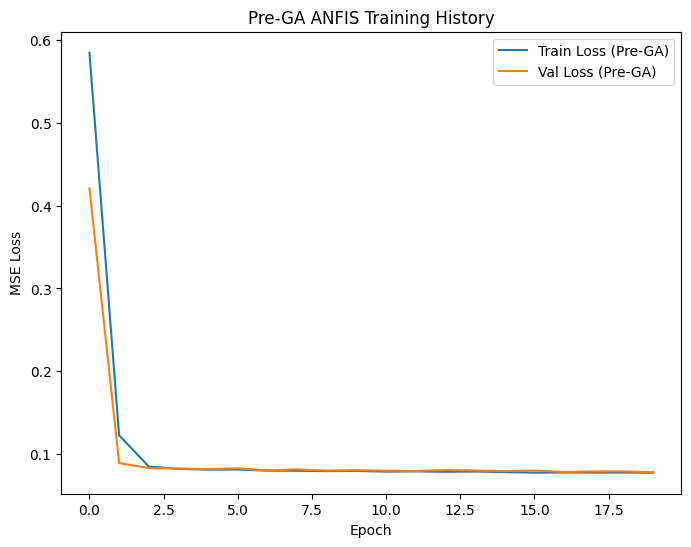

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt

# =============================================================================
# Data Loading & Preprocessing
# =============================================================================
data = pd.read_csv('/kaggle/input/short-dark-triad/SD3/data.csv', sep='\t')
question_cols = [f"M{i}" for i in range(1, 10)] + [f"N{i}" for i in range(1, 10)] + [f"P{i}" for i in range(1, 10)]
data[question_cols] = data[question_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=question_cols)
X = data[question_cols].values
X_norm = (X - 1) / 4.0
print("Normalized data shape:", X_norm.shape)

# =============================================================================
# Dimensionality Reduction via PCA
# =============================================================================
pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X_norm)
print("Reduced data shape:", X_reduced.shape)

# =============================================================================
# Robust Clustering: Compare KMeans and Agglomerative Clustering
# =============================================================================
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_reduced)
sil_kmeans = silhouette_score(X_reduced, kmeans_labels)
print("KMeans silhouette score:", sil_kmeans)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_reduced)
sil_agglo = silhouette_score(X_reduced, agglo_labels)
print("Agglomerative Clustering silhouette score:", sil_agglo)

# Choose the clustering method with the highest silhouette score
if sil_kmeans >= sil_agglo:
    print("Choosing KMeans clustering.")
    pseudo_labels = kmeans_labels
else:
    print("Choosing Agglomerative Clustering.")
    pseudo_labels = agglo_labels

y = pseudo_labels.astype(float).reshape(-1, 1)
print("Pseudo-label distribution:", np.bincount(pseudo_labels))

# Convert to PyTorch tensors
X_reduced_tensor = torch.tensor(X_reduced, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# =============================================================================
# Define Custom ANFIS Modules in PyTorch
# =============================================================================

class FuzzyLayer(nn.Module):
    def __init__(self, input_dim, num_mfs=2):
        super(FuzzyLayer, self).__init__()
        self.input_dim = input_dim
        self.num_mfs = num_mfs
        self.centers = nn.Parameter(torch.rand(input_dim, num_mfs))
        self.sigmas = nn.Parameter(torch.rand(input_dim, num_mfs))
    
    def forward(self, x):
        x_expanded = x.unsqueeze(2)  # (batch, input_dim, 1)
        membership = torch.exp(- (x_expanded - self.centers)**2 / (2 * self.sigmas**2 + 1e-6))
        return membership  # (batch, input_dim, num_mfs)

class RuleLayer(nn.Module):
    def __init__(self):
        super(RuleLayer, self).__init__()
    
    def forward(self, x):
        batch_size = x.shape[0]
        flat = x.view(batch_size, -1)
        return flat

class ConsequentLayer(nn.Module):
    def __init__(self, num_rules, output_dim=1):
        super(ConsequentLayer, self).__init__()
        self.num_rules = num_rules
        self.output_dim = output_dim
        self.consequents = nn.Parameter(torch.rand(num_rules, output_dim))
    
    def forward(self, x):
        norm_firing = x / (torch.sum(x, dim=1, keepdim=True) + 1e-6)
        output = torch.matmul(norm_firing, self.consequents)
        return output

class ANFIS(nn.Module):
    def __init__(self, input_dim, num_mfs=2, output_dim=1):
        super(ANFIS, self).__init__()
        self.fuzzy = FuzzyLayer(input_dim, num_mfs)
        self.rule = RuleLayer()
        self.num_rules = input_dim * num_mfs
        self.consequent = ConsequentLayer(self.num_rules, output_dim)
    
    def forward(self, x):
        fuzzy_out = self.fuzzy(x)       # (batch, input_dim, num_mfs)
        rule_out = self.rule(fuzzy_out)   # (batch, input_dim * num_mfs)
        output = self.consequent(rule_out) # (batch, output_dim)
        return output

# =============================================================================
# Helper Functions to Flatten and Set Model Parameters
# =============================================================================
def get_flat_params(model):
    return np.concatenate([p.detach().cpu().numpy().flatten() for p in model.parameters()])

def set_flat_params(model, flat_params):
    pointer = 0
    for p in model.parameters():
        numel = p.numel()
        new_val = flat_params[pointer:pointer+numel].reshape(p.shape)
        p.data = torch.tensor(new_val, dtype=p.data.dtype, device=p.data.device)
        pointer += numel

# =============================================================================
# Build and Train the ANFIS Model using Gradient Descent
# =============================================================================
input_dim = X_reduced.shape[1]
num_mfs = 2
output_dim = 1
model = ANFIS(input_dim=input_dim, num_mfs=num_mfs, output_dim=output_dim)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
batch_size = 16
dataset_size = X_reduced_tensor.shape[0]

indices = np.arange(dataset_size)
np.random.shuffle(indices)
split = int(0.8 * dataset_size)
train_idx, val_idx = indices[:split], indices[split:]
X_train = X_reduced_tensor[train_idx]
y_train = y_tensor[train_idx]
X_val = X_reduced_tensor[val_idx]
y_val = y_tensor[val_idx]

loss_history = []
val_loss_history = []
for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size()[0])
    epoch_loss = 0.0
    for i in range(0, X_train.size()[0], batch_size):
        optimizer.zero_grad()
        indices_batch = permutation[i:i+batch_size]
        batch_x = X_train[indices_batch]
        batch_y = y_train[indices_batch]
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)
    epoch_loss /= X_train.size()[0]
    loss_history.append(epoch_loss)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val).item()
        val_loss_history.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f} - Val Loss: {val_loss:.4f}")

# =============================================================================
# GA Optimization to Refine ANFIS Parameters
# =============================================================================
population_size = 100
num_generations = 40
mutation_rate = 0.2
crossover_rate = 0.7

base_params = get_flat_params(model)
param_size = base_params.shape[0]
population = np.array([base_params + np.random.randn(param_size) * 0.05 for _ in range(population_size)])

def fitness_function(candidate):
    set_flat_params(model, candidate)
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        mse = mean_squared_error(y_val.cpu().numpy(), val_pred.cpu().numpy())
    return 1.0 / (mse + 1e-6)

def tournament_selection(pop, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(pop)):
        participants = np.random.choice(len(pop), tournament_size, replace=False)
        best = participants[np.argmax([fitnesses[i] for i in participants])]
        selected.append(pop[best])
    return np.array(selected)

def crossover(parent1, parent2):
    point = np.random.randint(1, param_size)
    child = np.concatenate((parent1[:point], parent2[point:]))
    return child

def mutate(candidate, mutation_rate):
    for i in range(param_size):
        if np.random.rand() < mutation_rate:
            candidate[i] += np.random.randn() * 0.01
    return candidate

best_candidate = None
best_fitness = -np.inf

for gen in range(num_generations):
    fitnesses = np.array([fitness_function(candidate) for candidate in population])
    gen_best_idx = np.argmax(fitnesses)
    if fitnesses[gen_best_idx] > best_fitness:
        best_fitness = fitnesses[gen_best_idx]
        best_candidate = population[gen_best_idx].copy()
    print(f"Generation {gen+1}/{num_generations} - Best Fitness: {fitnesses[gen_best_idx]:.6f}")
    selected_population = tournament_selection(population, fitnesses, tournament_size=3)
    new_population = []
    for i in range(0, population_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % population_size]
        if np.random.rand() < crossover_rate:
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
        else:
            child1, child2 = parent1.copy(), parent2.copy()
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        new_population.extend([child1, child2])
    population = np.array(new_population)[:population_size]

set_flat_params(model, best_candidate)
print("Best GA fitness:", best_fitness)

# =============================================================================
# Final Evaluation After GA Optimization
# =============================================================================
model.eval()
with torch.no_grad():
    y_pred = model(X_reduced_tensor).cpu().numpy()
final_mse = mean_squared_error(y, y_pred)
print("Final ANFIS Model Training MSE after GA:", final_mse)
y_pred_labels = np.rint(y_pred).astype(int)
y_true_labels = y.astype(int)
accuracy = np.mean(y_pred_labels == y_true_labels)
print("Final ANFIS Model Classification Accuracy after GA:", accuracy)

# Save model weights to a .pth file
torch.save(model.state_dict(), '/kaggle/working/final_model_weights.pth')
print("Model weights saved to final_model_weights.pth")

# Plot pre-GA training history
plt.figure(figsize=(8,6))
plt.plot(loss_history, label='Train Loss (Pre-GA)')
plt.plot(val_loss_history, label='Val Loss (Pre-GA)')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Pre-GA ANFIS Training History")
plt.legend()
plt.show()


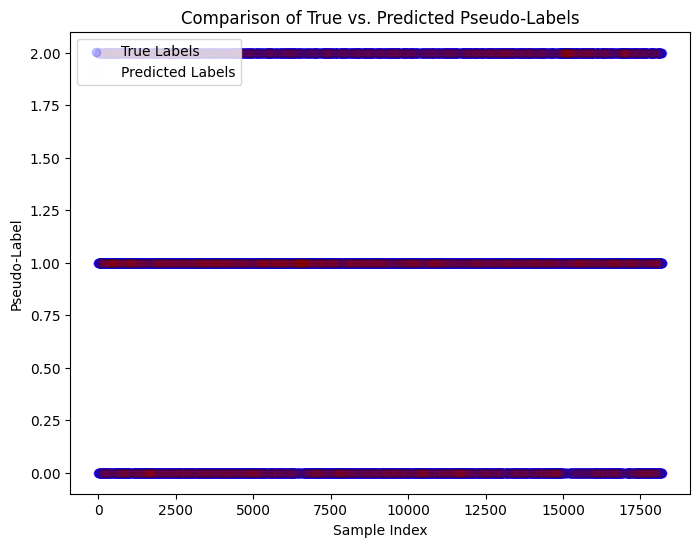

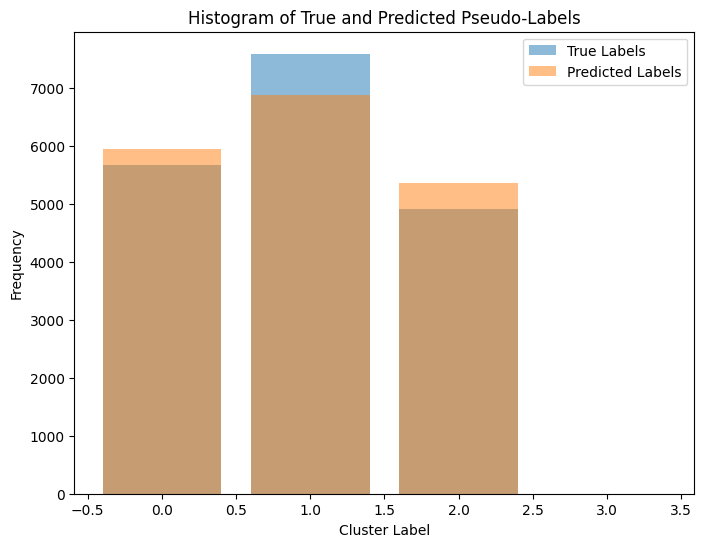

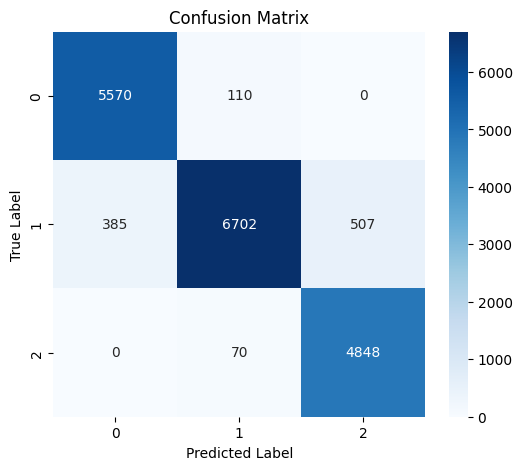

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# After running your model evaluation, suppose you have:
# y_true_labels: true pseudo-labels as integers
# y_pred_labels: model predictions (rounded to nearest integer)

# Scatter plot: Predicted vs. True Pseudo-Labels
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_true_labels)), y_true_labels, color='blue', label='True Labels', alpha=0.2)
plt.scatter(range(len(y_pred_labels)), y_pred_labels, color='red', label='Predicted Labels', alpha=0.008)
plt.xlabel("Sample Index")
plt.ylabel("Pseudo-Label")
plt.title("Comparison of True vs. Predicted Pseudo-Labels")
plt.legend()
plt.show()

# Histogram of Predictions vs. True Labels
plt.figure(figsize=(8,6))
plt.hist(y_true_labels, bins=np.arange(-0.5, 4, 1), alpha=0.5, label='True Labels', rwidth=0.8)
plt.hist(y_pred_labels, bins=np.arange(-0.5, 4, 1), alpha=0.5, label='Predicted Labels', rwidth=0.8)
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.title("Histogram of True and Predicted Pseudo-Labels")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
